<a href="https://colab.research.google.com/github/rrizkiramadhan08/RizkiRamadhanTask/blob/main/FirstWeekTasks/04_Logistic_Regression_Rizki_Ramadhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

## Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

## Importing the dataset

In [ ]:
# Load the dataset
dataset = pd.read_csv('/content/Social_Network_Ads.csv')

## Splitting the dataset into the Training set and Test set

---



In [ ]:
# Selecting features and target variable
from sklearn.model_selection import train_test_split
#  Assuming the features are 'Age' and 'EstimatedSalary' and the target is 'Purchased'
X = dataset[['Age', 'EstimatedSalary']].values
y = dataset['Purchased'].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=90)


## Feature Scaling

In [ ]:
# Scaling the features for better model performance

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Fit and transform the training data
X_test = scaler.transform(X_test) # Transform the test data

## Training the Logistic Regression model on the Training set

In [ ]:
# Fitting Logistic Regression to the training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0) # Train the model
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting a new result

In [ ]:
# Predicting a new result
# Example of a new user data: Age = 30, Estimated Salary = 87000
new_data = np.array([[30, 87000]])

# Apply the same scaling used during training to the new data
new_data_scaled = scaler.transform(new_data)

# Predicting the new result using the trained classifier
new_prediction = classifier.predict(new_data_scaled)

# Print the predicted class
if new_prediction == 1:
    print("The model predicts that the user will make a purchase.")
else:
    print("The model predicts that the user will not make a purchase.")


The model predicts that the user will not make a purchase.


## Predicting the Test set results

In [ ]:
# Predicting the Test set results

y_pred = classifier.predict(X_test) # Make predictions on the test set


## Making the Confusion Matrix

In [ ]:
# Evaluating the model with a confusion matrix and accuracy score

cm = confusion_matrix(y_test, y_pred) # Confusion matrix
print('Confusion Matrix:\n', cm)
print('Accuracy Score:', accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[128   5]
 [ 14  53]]
Accuracy Score: 0.905


## Visualising the Training set results

<ipython-input-13-03b8de96bfa8>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


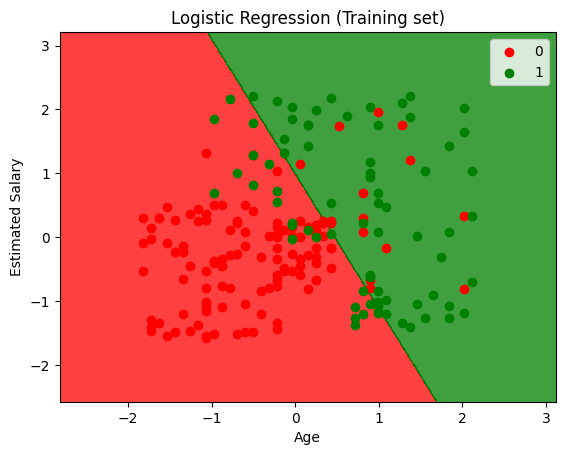

In [ ]:
from matplotlib.colors import ListedColormap

# Visualizing the Training set results
def plot_decision_boundary(X_set, y_set, classifier, title):
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('red', 'green')))

    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=ListedColormap(('red', 'green'))(i), label=j)

    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

# Plotting the training set results
plot_decision_boundary(X_train, y_train, classifier, 'Logistic Regression (Training set)')


## Visualising the Test set results

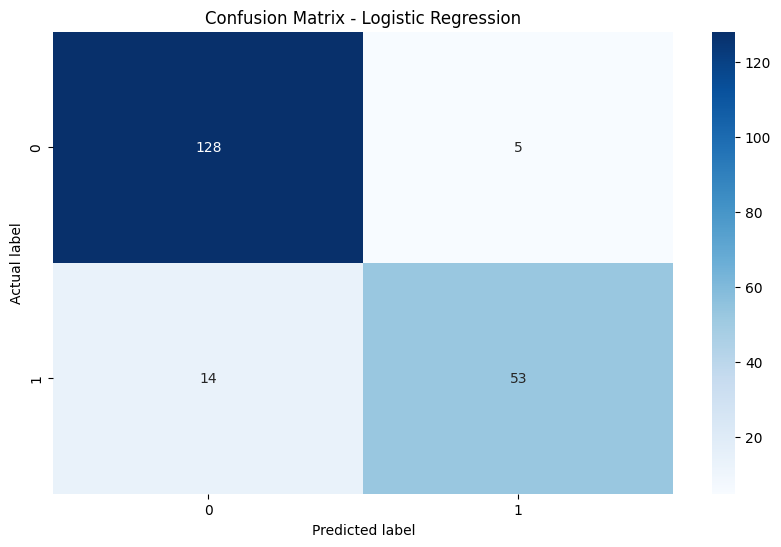

In [ ]:
# Visualizing the Test set results (optional)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()